Title: Binary vs. Multi-Class Classification<br>

Task 1:<br>
Binary Classification: Predict if a website visitor will click a button (Click or No Click).<br>
Use a web visitor interaction dataset.<br>
Task: Implement binary classification for click prediction.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Simulate a web visitor interaction dataset
# In a real scenario, you would load your actual dataset
data = {
    'visit_duration': [10, 5, 15, 20, 8, 12, 7, 18, 9, 11],
    'pages_viewed': [3, 1, 5, 7, 2, 4, 1, 6, 2, 3],
    'time_of_day': [10, 14, 18, 22, 9, 16, 11, 20, 13, 17],
    'previous_clicks': [0, 0, 1, 2, 0, 1, 0, 1, 0, 0],
    'clicked': [0, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 for Click, 0 for No Click
}
df = pd.DataFrame(data)

print("Simulated web visitor interaction dataset:")
print(df.head())

# Separate features (X) and target (y)
X = df.drop('clicked', axis=1)
y = df['clicked']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train a Logistic Regression model (a common choice for binary classification)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No Click', 'Click'])

print("\nBinary Classification for Click Prediction:")
print(f"Accuracy on the test set: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

Simulated web visitor interaction dataset:
   visit_duration  pages_viewed  time_of_day  previous_clicks  clicked
0              10             3           10                0        0
1               5             1           14                0        0
2              15             5           18                1        1
3              20             7           22                2        1
4               8             2            9                0        0

Binary Classification for Click Prediction:
Accuracy on the test set: 1.0000

Classification Report:
              precision    recall  f1-score   support

    No Click       1.00      1.00      1.00         2
       Click       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Task 2:<br>
Multi-Class Classification: Recognize handwritten digits (0-9).<br>
Use the MNIST dataset.<br>
Task: Develop a model that correctly classifies each handwritten digit.<br>


2025-05-12 16:30:20.465256: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-12 16:30:20.687228: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-12 16:30:20.829145: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747067420.981541    4205 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747067421.022152    4205 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747067421.293231    4205 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
MNIST dataset loaded successfully!
Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of testing images: (10000, 28, 28)
Shape of testing labels: (10000,)

Shape of flattened training images: (60000, 784)
Shape of flattened testing images: (10000, 784)

Training the Logistic Regression model...


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Evaluating the model...
Accuracy on the test set: 0.9256

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.94      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



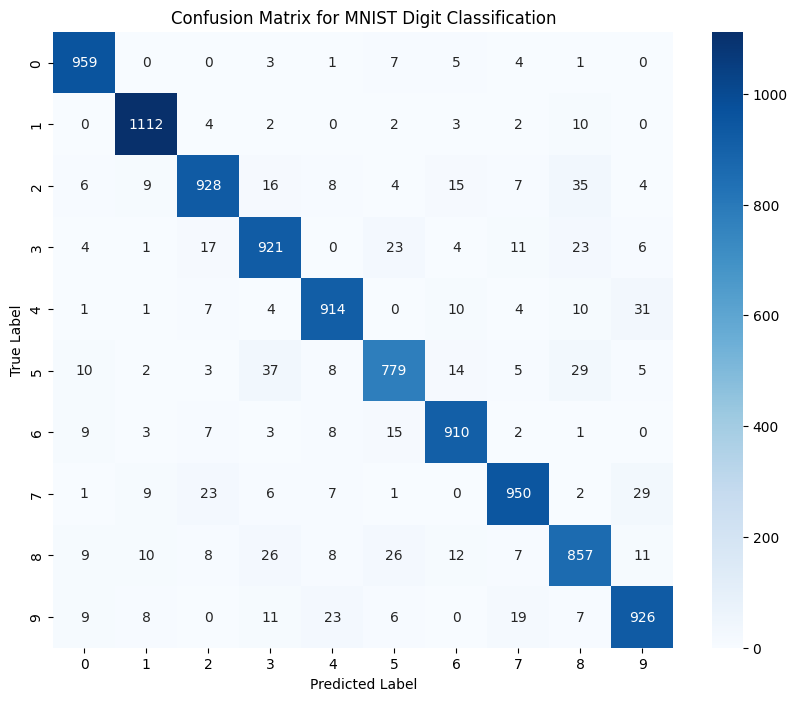

In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MNIST dataset from TensorFlow Keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("MNIST dataset loaded successfully!")
print(f"Shape of training images: {X_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of testing images: {X_test.shape}")
print(f"Shape of testing labels: {y_test.shape}")

# Data preprocessing: Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the 28x28 images into a 784-dimensional vector
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print(f"\nShape of flattened training images: {X_train_flat.shape}")
print(f"Shape of flattened testing images: {X_test_flat.shape}")

# Since it's a multi-class classification (10 classes: 0-9),
# Logistic Regression can be used with the 'multinomial' option.
model = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs', max_iter=100)

print("\nTraining the Logistic Regression model...")
model.fit(X_train_flat, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_flat)

print("\nEvaluating the model...")
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy on the test set: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Digit Classification')
plt.show()

Task 3:<br>
Multi-Class Classification: Classify a flower species based on petal and sepal measurements.<br>
Use the Iris dataset.<br>
Task: Use features to classify into three species: Setosa, Versicolor, or Virginica.


Iris dataset loaded successfully!
Shape of features: (150, 4)
Shape of target: (150,)

First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Training the Logistic Regression model...

Model trained and evaluated!
Accuracy on the test set: 0.9111

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.73      0.85     

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


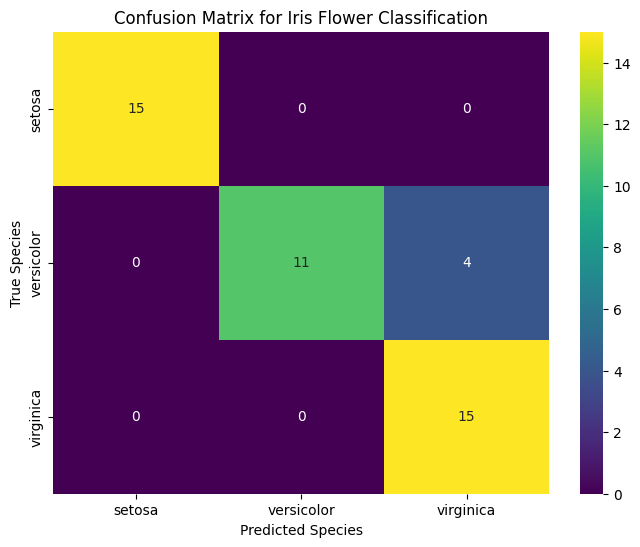

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("Iris dataset loaded successfully!")
print(f"Shape of features: {df[iris.feature_names].shape}")
print(f"Shape of target: {df['target'].shape}")
print("\nFirst few rows of the dataset:")
print(df.head())

# Separate features (X) and target (y)
X = df[iris.feature_names]
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train a Logistic Regression model for multi-class classification
model = LogisticRegression(random_state=42, multi_class='ovr', solver='liblinear')
# 'ovr' (One-vs-Rest) is another common strategy for multi-class with Logistic Regression
# 'liblinear' solver is often suitable for smaller datasets like Iris

print("\nTraining the Logistic Regression model...")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
confusion = confusion_matrix(y_test, y_pred)

print("\nModel trained and evaluated!")
print(f"Accuracy on the test set: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.title('Confusion Matrix for Iris Flower Classification')
plt.show()